In [352]:
# Librerias utilizadas
import matplotlib.pyplot as plt
import numpy as np
import scipy


Modelo Ising 1D

In [353]:
#Definimos parametros

J = 1
nEspines = 100
kBT = 1

#Iniciamos el arreglo de entradas
arregloEspines = np.ones(nEspines)
arregloEspines = arregloEspines * 1/2
estados = arregloEspines
estados  = np.concatenate(([estados],[arregloEspines]), axis=0)

def definirParametrosGlobales(J1 = 1,nEspines1 = 100, kBT1 = 1, orinentacion = 3 ):
    global J
    global nEspines
    global kBT
    global estados
    global arregloEspines
    J = J1
    nEspines = nEspines1
    kBT = kBT1
    if orinentacion == 1:
        arregloEspines = np.zeros(nEspines)
        #arregloEspines = arregloEspines * 1/2
    elif orinentacion == 2:
        arregloEspines = np.ones(nEspines)
        #arregloEspines = arregloEspines * -1/2
    else:
        arregloEspines = np.random.choice(a = [0, 1], size=nEspines)
    estados = arregloEspines
    estados  = np.concatenate(([estados],[arregloEspines]), axis=0)



In [354]:
def calculoDeEnergia(arregloEspines):
    '''
    :param arregloEspines: arreglo de dimension [1, N] con los estados de los espines.
    :return: calculo de la energia
    '''
    energiaVector = 0
    for i in range(arregloEspines.size-1):
        if i == arregloEspines.size-1:
            energiaVector += arregloEspines[i] * arregloEspines[0]
        else:
            energiaVector += arregloEspines[i] * arregloEspines[i+1]

    return -J    * energiaVector


def cambioEspin():
    '''
    :return: determina un espin aleatorio al cual cambiarle el estado, esto se define segun el tamano del arreglo de espines.
    '''
    espin = np.random.randint(low = 0, high = nEspines-1)
    return espin


def calculoDeltaE():
    '''
    :return: retorna 3 elementos, primeramente el valor de 'delta energia' el cual corresponde a la diferencia
    de energia entre el estado 2 y el estado 1, seguidamente los valores de estado 2 y estado 1.
    '''
    estado1 = np.copy(estados[-1])
    estado2 = np.copy(estados[-1])
    espinAleatorio = cambioEspin()
    if estado2[espinAleatorio] == 0:
        estado2[espinAleatorio] =  1
    else:
        estado2[espinAleatorio] = 0
    energia1 = calculoDeEnergia(estado1)
    energia2 = calculoDeEnergia(estado2)
    deltaE = energia2 - energia1
    return deltaE, estado2, estado1


#Algoritmo Metropolis
def nuevoEstado():
    '''

    :return: retorna un arreglo con un nuevo estado.
    '''
    global estados
    deltaE, estadoPosible, estadoViejo = calculoDeltaE()
    if deltaE <= 0:
        estados = np.concatenate((estados, [estadoPosible]), axis=0)
    elif metropolisAuxiliar(deltaE):
        estados = np.concatenate((estados, [estadoPosible]), axis=0)
    else:
        estados = np.concatenate((estados, [estadoViejo]), axis=0)


def metropolisAuxiliar(deltaE):
    '''
    :param deltaE: delta de energio calculado con la funcion calculoDeltaE
    :return: retorna true en caso de que el numeroAleatorio calculado sea menor al valor R, false en el caso contrario.
    '''
    numeroAleatorio = np.random.random()
    R = np.exp(-deltaE / kBT)
    if numeroAleatorio <= R:
        return True
    else:
        return False


def graficarPasos(numeroPasos):
    '''
    :param numeroPasos: cantidad de pasos que desea realizar.
    :return: grafuca cada uno de los estados, para cada paso.
    '''
    for i in range(numeroPasos):
        nuevoEstado()
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    ax.matshow(np.transpose(estados))
    plt.show()

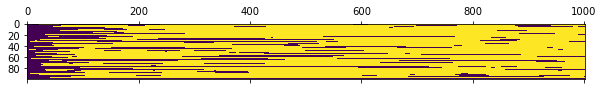

In [355]:
definirParametrosGlobales(kBT1 = 1, orinentacion=1)
graficarPasos(1000)

In [356]:
def calculoMagnetizacion(arregloEspines):
    '''
    :param arregloEspines: arreglo de espines previamente definido
    :return: el valor absoluto de la suma de cada elemento del arreglo de espines.
    '''
    resultado = 0
    for i in arregloEspines:
        resultado += i
    resultado = np.abs(resultado)
    return resultado


def energiaInterna(matrizEspines):
    '''
    :param matrizEspines: matriz con los espines de una dimension definida anteriormente.
    :return: retorna el promedio de este arreglo de espines.
    '''
    resultado = np.average(matrizEspines)
    return resultado

def calculoU2(matrizEspines):
    '''
    :param matrizEspines: matriz de espines previamente definida.
    :return: retorna el promedio de la matriz de espines al cuadrado.
    '''
    resultado = matrizEspines**2
    resultado = np.average(resultado)
    return resultado

def calculoC(arregloEspines):
    '''
    :param arregloEspines: arreglo de espies definido anteriormente.
    :return: calor especifico
    '''
    u2 = calculoU2(arregloEspines)
    u = energiaInterna(arregloEspines)
    resultado = (u2 - u**2) / kBT**2
    return resultado

def calculoArregloC(matrizEspines):
    '''
    :param matrizEspines: matriz de espines
    :return: calculo del calor especifico para cada
    '''
    resultado = []
    numeroIteraciones, longitudArreglo = np.shape(matrizEspines)
    for nArreglo in range(numeroIteraciones):
        resultado += [calculoC(matrizEspines[nArreglo]) / (nArreglo**2)]
    print("resultado:")
    print(resultado)
    return resultado


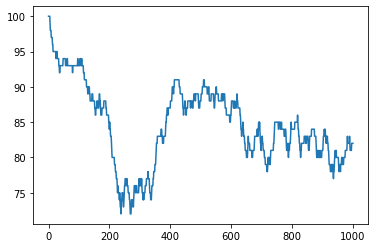

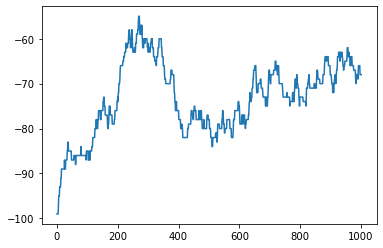

In [357]:
def parametrosSimulacion(kbt = 10, nPasos = 1000):
    '''
    :param kbt: Constante de Boltzmann mutiplicado por temperatura cuadrada.
    :param nPasos: pasos que se desean realizar en la simulacion.
    :return: Calculo de la magnetizacion y calculo de la energia interna de la simulacion.
    '''
    definirParametrosGlobales(kBT1=kbt, orinentacion=2)
    for i in range(nPasos):
        nuevoEstado()
    magnetizacion = []
    energia = []
    for arreglo in estados:
        magnetizacion += [calculoMagnetizacion(arreglo)]
        energia += [calculoDeEnergia(arreglo)]
    return magnetizacion, energia

def buscandoEquilibrio():
    '''
    :return: Grafica de la busqueda de equilibrio.
    '''
    magnetizacion, energia = parametrosSimulacion(kbt=1)
    fig1, ax1 = plt.subplots()
    ax1.plot(magnetizacion)
    fig2, ax2 = plt.subplots()
    ax2.plot(energia)
    plt.show()

buscandoEquilibrio()

In [358]:
def calcularEEquilibrio(matrizEnergias):
    matrizEnergias = matrizEnergias[500:]
    resultado = np.average(matrizEnergias)
    return resultado

def calcularMEquilibrio(matrizMagnetizacion):
    matrizMagnetizacion = matrizMagnetizacion[500:]
    resultado = np.average(matrizMagnetizacion)
    return resultado

In [359]:
def calcularEquilibrio(nSimulaciones, kbt=1):
    U = []
    M = []
    for i in range(nSimulaciones):
        magnetizacion, energia = parametrosSimulacion(kbt = kbt)
        U += [calcularEEquilibrio(energia)]
        M += [calcularMEquilibrio(magnetizacion)]
    resultadoM = np.average(M)
    resultadoU = np.average(U)
    return resultadoM, resultadoU


calcularEquilibrio(20)

(82.30966135458166, -69.40039840637449)

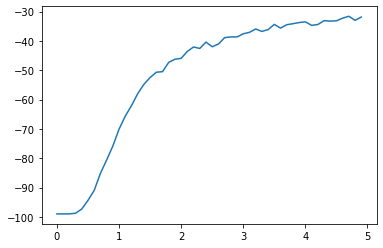

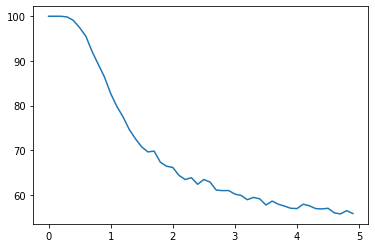

In [360]:
def configuraciones():
    U = []
    M = []
    listaKbt = np.arange(0.000001, 5, 0.1)
    for kb in listaKbt:
        resM, resU = calcularEquilibrio(20, kbt = kb)
        U += [resU]
        M += [resM]
    fig1, ax1 = plt.subplots()
    fig2, ax2 = plt.subplots()
    ax1.plot(listaKbt, U)
    ax2.plot(listaKbt, M)
    plt.show()
configuraciones()